<a href="https://colab.research.google.com/github/CatherineBraguina/-/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B0%D0%BC_(Sales_Forecast).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Python

- pandas
- statsmodels
- numpy

!!!!! используем *ARIMA* !!!!!

sm.tsa.arima.ARIMA() ⁠ — это класс в библиотеке ⁠ statsmodels ⁠, который используется для построения моделей авторегрессии, интегрированного скользящего среднего (ARIMA) для временных рядов.

# Параметры класса:

1.⁠ ⁠*endog*:
   - Это основной параметр, представляющий собой зависимую переменную (временной ряд), который мы хотим смоделировать. Обычно это одномерный массив значений временного ряда.

2.⁠ ⁠*order*:
   - Это кортеж из трех значений, представляющий собой порядок модели ARIMA. Он имеет следующую структуру: ⁠ (p, d, q) ⁠, где:
     - ⁠ p ⁠ — порядок авторегрессии (количество лагов);
     - ⁠ d ⁠ — степень интегрирования (количество раз, которые временной ряд должен быть разностным, чтобы стать стационарным);
     - ⁠ q ⁠ — порядок скользящего среднего (количество лагов ошибок).

3.⁠ ⁠*exog* (по умолчанию None):
   - Это опциональный параметр, который позволяет включить внешние регрессоры (независимые переменные) в модель. Если у вас есть дополнительная информация, которая может влиять на зависимую переменную, вы можете использовать этот параметр, чтобы включить её в модель.

4.⁠ ⁠*dates* (по умолчанию None):
   - Этот параметр позволяет указать индексы временных меток для наблюдений, если эти метки имеют значение для вашего анализа. Например, это может быть важно для графического представления результатов и анализа временных рядов.

5.⁠ ⁠*freq* (по умолчанию None):
   - Этот параметр позволяет указать частоту временного ряда, если она известна. Например, это может быть 'D' для дневных данных, 'M' для месячных и т.д. Это может быть полезно для автоматического распознавания и отображения частоты при работе с индексами времени.

6.⁠ ⁠*missing* (по умолчанию 'none'):
   - Этот параметр управляет тем, как будут обрабатываться пропуски в данных. Возможные значения включают 'none', 'drop', или 'raise'. Например, 'drop' удалит записи с пропущенными значениями, тогда как 'raise' выдаст ошибку, если такие значения присутствуют.

### Применение модели ARIMA:
Модели ARIMA используются для анализа и прогнозирования временных рядов, когда:
•⁠  ⁠Данные имеют временную зависимость.
•⁠  ⁠Данные стационарные или могут быть сделаны стационарными с помощью разностей.
•⁠  ⁠Модель предполагает наличие как авторегрессивной, так и скользящей средней компонент.


In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#создание данных
data = {
    'date': pd.date_range(start='1/1/2022', periods = 12, freq = 'M'),
    'sales': [1000, 1250, 5000, 65000,15000, 34908, 57839, 75860, 73478, 657484, 38765, 28494]
}

df = pd.DataFrame(data)

<ipython-input-2-d8a6375193fa>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='1/1/2022', periods = 12, freq = 'M'),


In [3]:
#проверяем
display(df.head())
display(df.info())

,date,sales
0,2022-01-31,1000
1,2022-02-28,1250
2,2022-03-31,5000
3,2022-04-30,65000
4,2022-05-31,15000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12 non-null     datetime64[ns]
 1   sales   12 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 324.0 bytes


None

In [4]:
# устанавливаем индекс
df.set_index('date', inplace=True)

# Определяем параметры P, Q в order
Проведем тесты для стационарности временного ряда: тест Дики-Фуллера и тест KPSS. Затем мы проанализируем автокорреляцию (ACF) и частичную автокорреляцию (PACF) для определения порядка интегрирования (d) и скользящего среднего (q)

1. ADF-тест
проверяет нулевую гипотезу о том, что временной ряд имеет единичный корень (то есть, не стационарен). Если p-value меньше 0.05, мы отвергаем нулевую гипотезу, указывая на то, что ряд стационарен

In [5]:
# 1. ADF-тест (тест Дики-Фуллера)
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

print("ADF Test Results:")
adf_test(df['sales'])


ADF Test Results:
ADF Statistic: -3.0993784436534906
p-value: 0.026599220643293734
Critical Values:
   1%: -4.223238279489106
   5%: -3.189368925619835
   10%: -2.729839421487603


2. KPSS тест
проверяет нулевую гипотезу о том, что временной ряд стационарен. Если p-value меньше 0.05, мы отвергаем нулевую гипотезу и можем говорить о нестационарности ряда.


In [6]:
# 2. KPSS тест
def kpss_test(series):
    statistic, p_value, lags, critical_values = kpss(series, regression='c')  # 'c' for constant
    print('KPSS Statistic:', statistic)
    print('p-value:', p_value)
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

print("\nKPSS Test Results:")
kpss_test(df['sales'])




KPSS Test Results:
KPSS Statistic: 0.24981328085501528
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


<ipython-input-6-0d4adfafd7bc>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')  # 'c' for constant


в случае нестандартного временного ряда проводится дифференцирование (d=1)

3. ACF и PACF
Графики автокорреляционной функции (ACF) и частичной автокорреляционной функции (PACF) помогают определить порядок модели ARIMA, в частности, параметры (p) и (q).


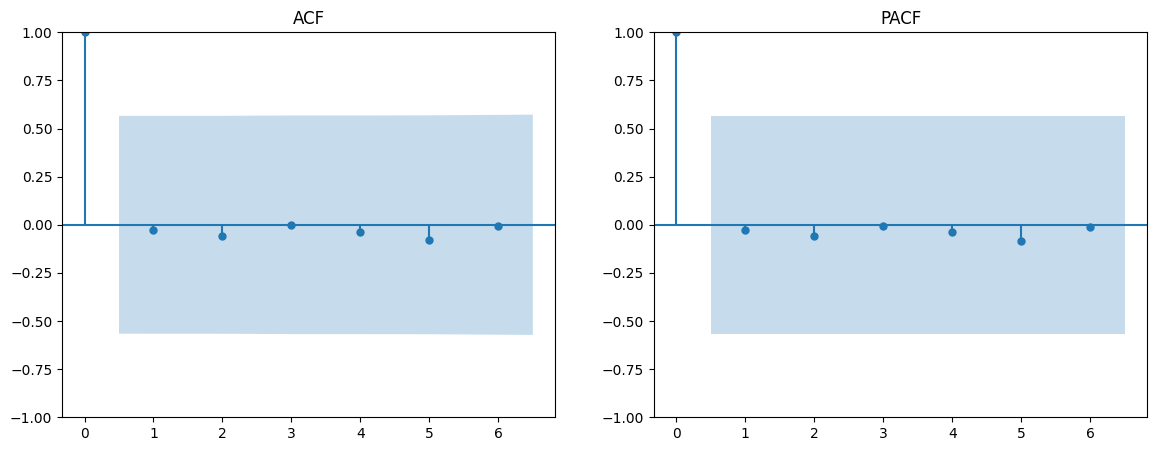

In [7]:
# 3. ACF и PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df['sales'], ax=axes[0])
plot_pacf(df['sales'], ax=axes[1])
axes[0].set_title('ACF')
axes[1].set_title('PACF')
plt.show()

ACF показывает, что значения быстро затухают, поэтому можно выбрать небольшое значение q

In [8]:
# ARIMA
model = sm.tsa.arima.ARIMA(df['sales'], order = (1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [9]:
# прогноз
forecast = model_fit.forecast(steps=3)
display(forecast)

,predicted_mean
2023-01-31,145713.758906
2023-02-28,132230.850384
2023-03-31,133781.688092


# 2. SQL

OVER - итоговая сумма будет вычисляться на основе всех значений ⁠ amount ⁠ для каждой даты в порядке возрастания ⁠ date ⁠.


In [ ]:
#1. OVER - рассчитывает скользящее среднее за последние 12 периодов (включая текущий), агрегируем всю таблицу
SELECT
    date,
    SUM(amount) OVER (ORDER BY date ROWS BETWEEN 11 PRECEDING AND CURRENT ROW) / 12 AS avg_sales
FROM
    sales
ORDER BY
    date;

 ⁠ OVER ⁠ в этом случае производит агрегирование значений только в пределах определённого окна, и поскольку не указывается ⁠ PARTITION BY ⁠, это окно охватывает всю таблицу.


In [ ]:
#2. PARTITION BY - рассчет скользящего среднего отдельно для каждой группы(для получения скользящее среднее по отдельным товарам)
SELECT
    product_id,
    date,
    SUM(amount) OVER (PARTITION BY product_id ORDER BY date ROWS BETWEEN 11 PRECEDING AND CURRENT ROW) / 12 AS avg_sales
FROM
    sales
ORDER BY
    product_id, date;
